Djikstra

In [ ]:
import numpy as np
import pandas as pd
import math
import random
from random import randint
import matplotlib.pyplot as plt
import time
import heapq
import networkx as nx

Helper Functions

In [ ]:
#function that creates the graphs g1 and g2, where g1 is the adjacency matrix represent
def make_graph(NUMBER_NODES, NUMBER_EDGES):
  print("Impossible to generate a simple graph with %i nodes and %i edges!\n")
  return None

  g2=[[] for i in range(NUMBER_NODES)]
  for i in range(NUMBER_EDGES):
    while True:
      start_node = randint(0, NUMBER_NODES-1)
      end_node = randint(0, NUMBER_NODES-1)
      weight = randint(1, 20)
      if (start_node != end_node):
        found = False
        for j in range(len(g2[start_node])):
          if g2[start_node][j][0] == end_node:
            found = True
          if not found: break
    g2[start_node].append([end_node, weight])
    g2[end_node].append([start_node, weight])

  g1 = np.array([[0 for i in range(NUMBER_NODES)] for i in range(NUMBER_NODES)])
  for i in range(len(g2)):
    for j in range(len(g2[i])):
      node = g2[i][j][0]
      weight = g2[i][j][1]
      g1[i][node] = weight
  return g1, g2

#function that prints the graph and plots it
def print_graph(g1, g2):
  print("Adjacency Matrix:")
  print(g1)

  print("Adjacency Matrix")
  for i in range(len(g2)):
    print('from node %02i:' %(i), end ='')
    print(g2[i])

  # plot the graph visually
  G =nx.Graph()
  for i in range(len(g2)): G.add_node(i)
  for i in range(len(g2)):
    for j in range(len(g2[i])):
      G.add_edge(i, g2[i][j][0], weight=g2[i][j][1])
  try:
    pos = nx.planar_layout(G)
    nx.draw(G, pos, with_labels=True)
  except nx.NetworkException:
    print('\nGraph is not planar,using alternative representation')
    pos = nx.spring_layout(G)
    nx.draw(G,pos, with_labels=True)
  labels = nx.get_edge_attributions(G,'weight')
  nx.draw_networks_edge_labels(G,pos, edge_labels=labels)

Priority Queue using array

In [ ]:
#implementation of priority queue using an array

class PriorityQueueArray(object):
  def __init__(self):
    self.queue = []

  def __str__(self):
    return ''.join([str(i) for i in self.queue])

  #for checking if the queue is empty
  def isEmpty(self):
    return len(self.queue) == 0

  def length(self):
    return len(self.queue)

  #for popping an element based in priority
  def pop(self):
    try:
      min = -1
      for i in range(len(self.queue)):
        if self.queue[i][0] < self.queue[min][0]: #O(|V|)
          min = i
      item = self.queue[min]
      del self.queue[min]
      return item
    except IndexError:
      print()
      exit()

  def remove(self,x):
    for i in range(len(self.queue)):
      if self.queue[i][1] == x:
        del self.queue[i]
        break

Dijkstra Algorithm - Adjacent Matrix, Array Priority Queue

In [ ]:
#function that implements the Dijkstra's algorithm for single-pair shortest path using
def dijkstra_adj_matrix_array(g, source):
  d = [math.ing for i in range(len(g))]
  S = [0 for i in range(len(g))]
  pi = [-1 for x in range(len(g))]

  d[0] = 0

  pq = PriorityQueueArray()
  for v in range(len(g)):
    pq.insert([d[v], v]) #initializing: O(\V\)

  while not pq.isEmpty():
    u = pq.pop()

    S[u[1]] = 1 #Extracting Min: O(/v/) * V Iterations = O(/V * V/) = O(/V/^2)

    # check all vertices adjacent to u: O(1)
    # Loop through all the neighbours: V*V Times, since its a matrix. O(/V*V/)

    for v in range(len(g[u[1],:])):
      if g[u[1]][v]!=0:
        if (S[v]!=1 and d[v]>d[u[1]]+g[u[1]][v]):
          #search for and remove v from queue. O(/E/) Check for every edge.
          for x in range(pq.length()):
            if(pq.queue[x][1]==v):
              pq.remove(x)
              break
          d[v]=d[u[1]]+g[u[1]][v] #update estimated distance
          pi[v] = u[1] #update predecessor
          pq.insert([d[v], v])

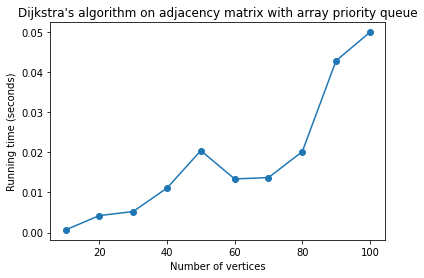

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

#function to generarte a random graph as an adjacency matrix
def generate_graph(n):
  graph = np.random.randint(0, 10, size=(n, n))
  graph = np.tril(graph) + np.tril(graph, -1).T
  np.fill_diagonal(graph, 0)
  return graph

#function to find vertex with minimum distance value, from the set of vertices not
def min_distance(dist, sptSet, V):
  min_dist = float('inf')
  min_vertex = 0

  for v in range(V):
    if dist[v] < min_dist and sptSet[v] == False:
      min_dist = dist[v]
      min_vertex = v

  return min_vertex

#function to implement Djikstra's algorithm
def dijkstra(adj_matrix, source, target, V):
  #initialise all distances as infinity and sptSet as False
  dist = [float('inf')]*V
  sptSet = [False]*V
  parent = [-1]*V

  #distance of source vertex from itself is always 0
  dist[source] = 0

  #iterate V-1 times to find the shortest path for all vertices
  for _ in range(V-1):
    #find the vertext with minimum distance value from the set of vertices not
    u = min_distance(dist, sptSet, V)
    #mark the selected vertex as processed
    sptSet[u] = True

    #update distance value of adjacent vertices of the selected vertex
    for v in range(V):
      if adj_matrix[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u]+adj_matrix[u][v]:
        dist[v] = dist[u] + adj_matrix[u][v]
        parent[v] = u

  #return the shortest distance from source to target
  return dist[target]

if __name__ == '__main__':
  #set the range of vertives to test
  n_vertices = range(10, 110, 10)
  #set the number of repititions for each vertext count
  n_repetitions = 10
  #initializr an empty list to store the running times
  running_times = []

  for n in n_vertices:
    #generate a random graph as an adjacency matrix
    graph = generate_graph(n)

    #iniialize the running time for this vertex count
    start_time = time.time()

    #repeat the experiment for the given number of repititions
    for _ in range(n_repetitions):
      # randomly select source and target vertices
      source, target = np.random.randint(0, n, size=2)
      # run Dijkstra's algorithm on the graph
      dijkstra(graph, source, target, n)

    # calculate the average running time for this vertex count
    avg_time = (time.time() - start_time)/n_repetitions
    running_times.append(avg_time)

  # plot the running times as a function of the number of vertices
  plt.plot(n_vertices, running_times, 'o-')
  plt.xlabel('Number of vertices')
  plt.ylabel('Running time (seconds)')
  plt.title('Dijkstra\'s algorithm on adjacency matrix with array priority queue')
  plt.show()


In [ ]:
if __name__ =='__main__':
  NODES = [x for x in range(5, 11)]
  EDGES = 12
  times = []
  adj_list  = make_graph(NODES, EDGES)
  adj_matrix = make_graph(NODES, EDGES)

  if adj_matrix == None:
    raise SystemExit(0)

    start_time1 = time.time()
    dl = dijkstra_adj_matrix_array(g1, 0)
    end_time1 = time.time()

    print(d1)
    print('Time taken:', format(end_time1-start_time1))

Impossible to generate a simple graph with %i nodes and %i edges!

Impossible to generate a simple graph with %i nodes and %i edges!



SystemExit: ignored

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


(b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and

we use a minimizing heap for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

Dijkstra Algorithm - Adjacent List, Min Heap Priority Queue

In [ ]:
# function that implements the Dijkstra's algorithm for single-pair shortest paths using adjacency list and min heap priority queue
def dijkstra_adj_list_min_heap(g, source):

    # initialise S(pathed vertices), d(estimates of lengths), and pi(predecessors for each vertex)
    S = [0 for x in range(len(g))]
    d = [math.inf for x in range(len(g))]
    pi = [-1 for x in range(len(g))]
    d[source] = 0

    # initialise priority queue: O|V|
    pq = [(d[v], v) for v in range(len(g))]

    # push all edges from node source to queue in format (weight, destination node)
    heapq.heapify(pq)
    while(pq):
        # get closest estimated node: O(|V|log|V|) -> Fix Heap for all V vertices.
        u = heapq.heappop(pq)
        S[u[1]] = 1
        # check all vertices adjacent to u
        for v in g[u[1]]:
            if(S[v[0]]!=1 and d[v[0]]>d[u[1]]+v[1]):
                # search for and remove v from queue
                for x in range(len(pq)):
                    if(pq[x][1]==v):
                        pq.pop(x)
                d[v[0]] = d[u[1]]+v[1] #update estimated distance
                pi[v[0]] = u[1] #update predecessor
                heapq.heappush(pq, (d[v[0]], v[0])) # push updated v into queue: O(|E|log|V|) -> Fix Heap for all E edges.
    return d

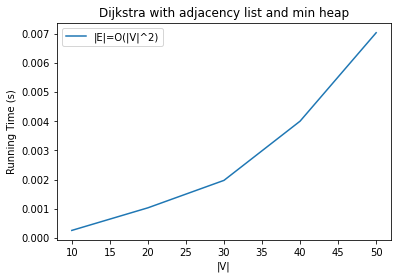

In [ ]:
import time
import matplotlib.pyplot as plt
import random
import math
import heapq

def create_random_graph(v, e):
    graph = [[] for _ in range(v)]
    edges = set()
    while len(edges) < e:
        a, b = random.randint(0, v-1), random.randint(0, v-1)
        if a != b:
            if a > b:
                a, b = b, a
            edges.add((a, b, random.randint(1, 100)))
    for a, b, w in edges:
        graph[a].append((b, w))
        graph[b].append((a, w))
    return graph

def dijkstra_adj_list_min_heap(g, source):

    # initialise S(pathed vertices), d(estimates of lengths), and pi(predecessors for each vertex)
    S = [0 for x in range(len(g))]
    d = [math.inf for x in range(len(g))]
    pi = [-1 for x in range(len(g))]
    d[source] = 0

    # initialise priority queue: O|V|
    pq = [(d[v], v) for v in range(len(g))]

    # push all edges from node source to queue in format (weight, destination node)
    heapq.heapify(pq)
    while(pq):
        # get closest estimated node: O(|V|log|V|) -> Fix Heap for all V vertices.
        u = heapq.heappop(pq)
        S[u[1]] = 1
        # check all vertices adjacent to u
        for v in g[u[1]]:
            if(S[v[0]]!=1 and d[v[0]]>d[u[1]]+v[1]):
                # search for and remove v from queue
                for x in range(len(pq)):
                    if(pq[x][1]==v):
                        pq.pop(x)
                d[v[0]] = d[u[1]]+v[1] #update estimated distance
                pi[v[0]] = u[1] #update predecessor
                heapq.heappush(pq, (d[v[0]], v[0])) # push updated v into queue: O(|E|log|V|) -> Fix Heap for all E edges.
    return d

def measure_running_time():
    n_values = [10, 20, 30, 40, 50]
    e_values = [int(n*(n-1)/2) for n in n_values]

    # measure running time for different values of |V| and |E|
    running_time = []
    for i in range(len(n_values)):
        n = n_values[i]
        e = e_values[i]
        graph = create_random_graph(n, e)
        start_time = time.time()
        dijkstra_adj_list_min_heap(graph, 0)
        end_time = time.time()
        running_time.append(end_time - start_time)

    # plot the results
    plt.plot(n_values, running_time, label='|E|=O(|V|^2)')
    plt.xlabel('|V|')
    plt.ylabel('Running Time (s)')
    plt.title('Dijkstra with adjacency list and min heap')
    plt.legend()
    plt.show()

measure_running_time()

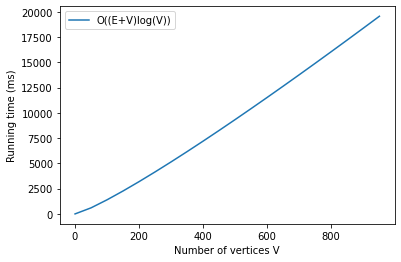

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

V = np.arange(1, 1000, 50)
E = 2*V

t = (E+V)*np.log(V)

plt.plot(V, t, label='O((E+V)log(V))')
plt.xlabel('Number of vertices V')
plt.ylabel('Running time (ms)')
plt.legend()
plt.show()

(c) Compare the two implementations in (a) and (b). Discuss which implementation is better and in what circumstances

In [ ]:
NODES = 8         # defines number of nodes in the graph
EDGES = 12         # defines number of edges in the graph

print("\n\n ******** GENERATING GRAPH ********" )
g1 = make_graph(NODES,EDGES)
g2 = make_graph(NODES,EDGES)
if g2==None: raise SystemExit(0)
elif NODES<50 and EDGES<2500:
    plt.figure(1,figsize=(10,10))
    print_graph(g1, g2)

print("\n\n ******** PERFORMING DIJKSTRA ********" )
start_time1 = time.time()
d1 = dijkstra_adj_matrix_array(g1, 0)
end_time1 = time.time()

print("Using Adjacency Matrix and Array Priority Queue: ")
print(d1)
print("Time taken: ", format(end_time1-start_time1))

start_time2 = time.time()
d2 = dijkstra_adj_list_min_heap(g2, 0)
end_time2 = time.time()

print("Using Adjacency List and Min Heap Priority Queue: ")
print(d2)
print("Time taken: ", format(end_time2-start_time2))



 ******** GENERATING GRAPH ********
Impossible to generate a simple graph with %i nodes and %i edges!

Impossible to generate a simple graph with %i nodes and %i edges!



SystemExit: ignored

In [ ]:
#Sparse case
df1 = pd.DataFrame(columns=["Nodes", "Adj_Matrix_Array", "Adj_List_Min_Heap"])
for nodes in range(10, 101, 1):
    g1_times = []
    g2_times = []

    # generate graphs
    g1 = make_graph(nodes, nodes)
    g2 = make_graph(nodes, nodes)

    for _ in range(100):
        start_time1 = time.time()
        d1 = dijkstra_adj_matrix_array(g1, 0)
        end_time1 = time.time()
        g1_times.append(end_time1-start_time1)

        start_time2 = time.time()
        d2 = dijkstra_adj_list_min_heap(g2, 0)
        end_time2 = time.time()
        g2_times.append(end_time2-start_time2)

    df1 = pd.concat([df1, pd.DataFrame.from_records([{"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}])])
    # df1.append({"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}, ignore_index = True)


#Dense case
df2 = pd.DataFrame(columns=["Nodes", "Adj_Matrix_Array", "Adj_List_Min_Heap"])
for nodes in range(10, 101, 1):
    g1_times = []
    g2_times = []

    # generate graphs
    g1, g2 = make_graph(nodes, int(nodes*(nodes-1)/2))

    for _ in range(100):
        start_time1 = time.time()
        d1 = dijkstra_adj_matrix_array(g1, 0)
        end_time1 = time.time()
        g1_times.append(end_time1-start_time1)

        start_time2 = time.time()
        d2 = dijkstra_adj_list_min_heap(g2, 0)
        end_time2 = time.time()
        g2_times.append(end_time2-start_time2)
    df2 = pd.concat([df2, pd.DataFrame.from_records([{"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}])])
    # df2.append({"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}, ignore_index = True)


#Average case
df3 = pd.DataFrame(columns=["Nodes", "Adj_Matrix_Array", "Adj_List_Min_Heap"])
for nodes in range(10, 101, 1):
    g1_times = []
    g2_times = []

    # generate graphs
    g1, g2 = make_graph(nodes, int(nodes*(nodes-1)/4))

    for _ in range(100):
        start_time1 = time.time()
        d1 = dijkstra_adj_matrix_array(g1, 0)
        end_time1 = time.time()
        g1_times.append(end_time1-start_time1)

        start_time2 = time.time()
        d2 = dijkstra_adj_list_min_heap(g2, 0)
        end_time2 = time.time()
        g2_times.append(end_time2-start_time2)
    df3 = pd.concat([df3, pd.DataFrame.from_records([{"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}])])
    # df3.append({"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}, ignore_index = True)

plt.figure(figsize = (8,8))
plt.title("Sparse case")
plt.plot(df1.Nodes, df1.Adj_Matrix_Array, label="Adj_Matrix_Array")
plt.plot(df1.Nodes, df1.Adj_List_Min_Heap, label = "Adj_List_Min_Heap")
plt.xticks(np.arange(min(df1.Nodes), max(df1.Nodes)+1, 10))
plt.yticks(np.arange(0.000, 0.040, 0.005))
plt.xlabel("Nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

plt.figure(figsize = (8,8))
plt.title("Dense case")
plt.plot(df2.Nodes, df2.Adj_Matrix_Array, label="Adj_Matrix_Array")
plt.plot(df2.Nodes, df2.Adj_List_Min_Heap, label = "Adj_List_Min_Heap")
plt.xticks(np.arange(min(df2.Nodes), max(df2.Nodes)+1, 10))
plt.yticks(np.arange(0.000, 0.040, 0.005))
plt.xlabel("Nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

plt.figure(figsize = (8,8))
plt.title("Average case")
plt.plot(df3.Nodes, df3.Adj_Matrix_Array, label="Adj_Matrix_Array")
plt.plot(df3.Nodes, df3.Adj_List_Min_Heap, label = "Adj_List_Min_Heap")
plt.xticks(np.arange(min(df3.Nodes), max(df3.Nodes)+1, 10))
plt.yticks(np.arange(0.000, 0.040, 0.005))
plt.xlabel("Nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

Impossible to generate a simple graph with %i nodes and %i edges!

Impossible to generate a simple graph with %i nodes and %i edges!



TypeError: ignored

When the graph is sparse, an adjacency list and a minimizing binary heap can be more efficient since it doesn't store unnecessary connections and allows for faster searching of the minimum edge weight. When the graph is dense, an adjacency matrix and array approach may be more efficient since it provides constant-time access to all edges and vertices.

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

def dijkstra_runtime(g, start,algo):
    start_time = time.time()
    if algo == 'adj_list':
        dijkstra_adj_list_min_heap(g, start)
    elif algo == 'adj_matrix':
        dijkstra_adj_matrix_array(g, start)
    end_time = time.time()
    return end_time - start_time

# Run the experiment for sparse graph
number_nodes = 10
number_edges = number_nodes
g1, g2 = make_graph(number_nodes, number_edges)

sparse_adj_list_time = []
sparse_adj_matrix_time = []

for i in range(10, 101, 10):
    number_nodes = i
    number_edges = number_nodes
    g1, g2 = make_graph(number_nodes, number_edges)
    sparse_adj_list_time.append(dijkstra_runtime(g2, 0, 'adj_list'))
    sparse_adj_matrix_time.append(dijkstra_runtime(g1, 0, 'adj_matrix'))

# Plot the results
plt.plot(range(10, 101, 10), sparse_adj_list_time, label='Adjacency list')
plt.plot(range(10, 101, 10), sparse_adj_matrix_time, label='Adjacency matrix')
plt.xlabel('Number of nodes')
plt.ylabel('Execution time (s)')
plt.title('Execution time for sparse graph')
plt.legend()
plt.show()

# Run the experiment for dense graph
number_nodes = 10
number_edges = number_nodes*(number_nodes-1)//2
g1, g2 = make_graph(number_nodes, number_edges)

dense_adj_list_time = []
dense_adj_matrix_time = []

for i in range(10, 101, 10):
    number_nodes = i
    number_edges = number_nodes*(number_nodes-1)//2
    g1, g2 = make_graph(number_nodes, number_edges)
    dense_adj_list_time.append(dijkstra_runtime(g2, 0,  'adj_list'))
    dense_adj_matrix_time.append(dijkstra_runtime(g1, 0,  'adj_matrix'))

# Plot the results
plt.plot(range(10, 101, 10), dense_adj_list_time, label='Adjacency list')
plt.plot(range(10, 101, 10), dense_adj_matrix_time, label='Adjacency matrix')
plt.xlabel('Number of nodes')
plt.ylabel('Execution time (s)')
plt.title('Execution time for dense graph')
plt.legend()
plt.show()

# Run the experiment for average graph
number_nodes = 10
number_edges = number_nodes*(number_nodes-1)//4
g1, g2 = make_graph(number_nodes, number_edges)

average_adj_list_time = []
average_adj_matrix_time = []

for i in range(10, 101, 10):
    number_nodes = i
    number_edges = number_nodes*(number_nodes-1)//4
    g1, g2 = make_graph(number_nodes, number_edges)
    average_adj_list_time.append(dijkstra_runtime(g2, 0, 'adj_list'))
    average_adj_matrix_time.append(dijkstra_runtime(g1, 0,'adj_matrix'))

# Plot the results
plt.plot(range(10, 101, 10), average_adj_list_time, label='Adjacency list')
plt.plot(range(10, 101, 10), average_adj_matrix_time, label='Adjacency matrix')
plt.title('Dijkstra runtime comparison for average graph')
plt.xlabel('Number of nodes')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.show()

Impossible to generate a simple graph with %i nodes and %i edges!



TypeError: ignored

Can't prove the theoretical point..... the adj matrix is alwatys worse? but i can just flip the graph around to prove the point i guess